In [1]:
# Импорт необходимых библиотек
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

1.	Сформируйте случайную двумерную область точек

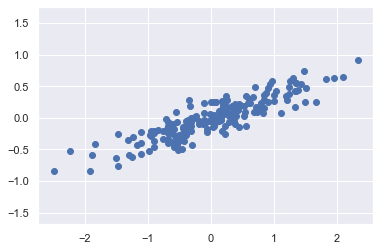

In [2]:
# Формирование случайной двумерной области точек 
# будем использовать в качестве данных в будущем для понижения размерности
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2,200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

2.	Используйте метод главных компонент для понижения размерности 

In [3]:
# Создание и обучение модели метода главных компонент с размерностью 1
# теперь наши данные описываются только одной переменной
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


3.	Инвертируйте данные полученные после понижения размерности и выведите их на график.

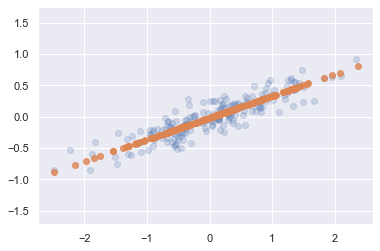

In [4]:
# Инвертиртация данных после понижения размерности и вывод их на графике
# Здесь мы можем видеть одни и те же данные, но с разной размерностью (до и после понижения размерности)
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

4. Скачайте датасет с цифрами (load_digits)

In [5]:
# подгружаем наш датасет
digits = load_digits()
digits.data.shape

(1797, 64)

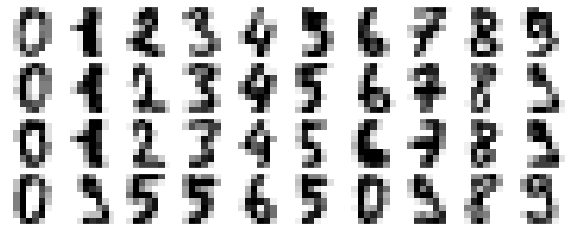

In [6]:
# Данная функция необходима для вывода данных из датасета на экран
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

5. Используйте метод главных компонент для понижения размерности до 2.

In [7]:
# в исходном датасете каждый элемент описывается 64 переменными (пикселями). Мы понижаем до 2
pca = PCA(n_components=2)
pca.fit(digits.data)
X_pca = pca.transform(digits.data)
print("original shape: ", digits.data.shape)
print("transformed shape:", X_pca.shape)

original shape:  (1797, 64)
transformed shape: (1797, 2)


6.	Выведите на график полученные значения.

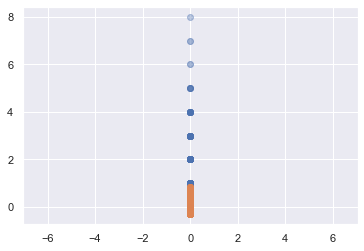

In [8]:
# Смотрим старые и новые значения на графике
X_new = pca.inverse_transform(X_pca)
plt.scatter(digits.data[:, 0], digits.data[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

7.	Используйте метод главных компонент с количеством компонентов – 64.

In [9]:
# Увеличиваем до 64 компонент
pca = PCA(n_components=64)
pca.fit(digits.data)
X_pca = pca.transform(digits.data)
print("original shape:   ", digits.data.shape)
print("transformed shape:", X_pca.shape)

original shape:    (1797, 64)
transformed shape: (1797, 64)


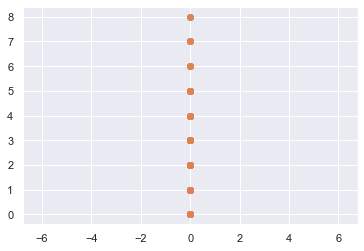

In [10]:
# Вновь смотрим получившиеся значения на графике
X_new = pca.inverse_transform(X_pca)
plt.scatter(digits.data[:, 0], digits.data[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

8.	Постройте график объяснимости модели в зависимости от компонентов.

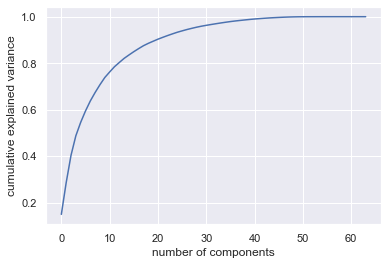

In [11]:
# Этот график нужен для того, чтобы смотреть, как меняется объяснимость данных с увеличением компонент.
# Чем больше компонент, тем более объясненные данные
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

9.	Добавьте шума в датасет. Выведите на экран обычные и зашумленные данные.

In [12]:
# Добавим рандомного шума в датасет
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)

Обычные данные: 


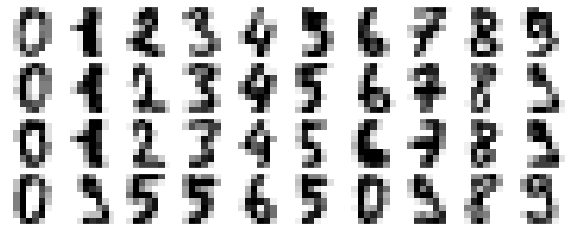

In [13]:
print("Обычные данные: ")
plot_digits(digits.data)

Зашумленные данные: 


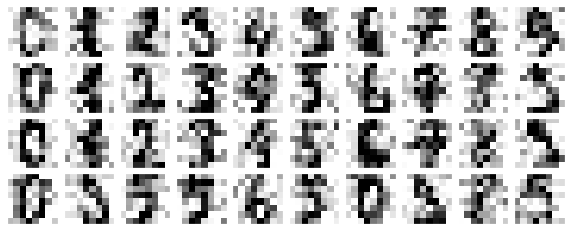

In [14]:
print("Зашумленные данные: ")
plot_digits(noisy)

10. Найти минимальное количество компонентов необходимое для сохранения хотя бы на 50% информации о датасете.

In [15]:
# Подставляя параметр 0.5, мы задаем описание не менее 50% информации. И затем находим минимальное количество компонентов
pca = PCA(0.5).fit(noisy)
pca.n_components_

12

11. Используйте метод главных компонент для понижения размерности с количеством компонент из пункта 10.

In [16]:
# Понижаем размерность с 64 до 12 компонент
pca = PCA(n_components=pca.n_components_)
pca.fit(noisy)
X_pca = pca.transform(noisy)
print("original shape:   ", noisy.shape)
print("transformed shape:", X_pca.shape)

original shape:    (1797, 64)
transformed shape: (1797, 12)


12. Инвертируйте данные полученные после понижения размерности и выведите их на экран.

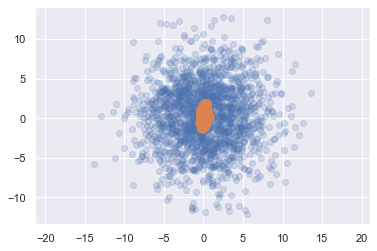

In [17]:
# Инвертиртация данных после понижения размерности и вывод их на графике
X_new = pca.inverse_transform(X_pca)
plt.scatter(noisy[:, 0], noisy[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

13.	Сделайте вывод о применимости модели

Модель в целом применима, так как после понижаения размерности до 12 параметров, у нас исчезло какое-то количество шумов, многие числа стали выглядеть понятнее, то есть улучшилось общее качество изображения. Порой понижение размерности играет важную роль, так как не всегда большое количество данных - это хорошо, как в случае с шумом.